In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Import heart dataset
data = pd.read_csv('datasets_23663_30246_diabetes.csv')
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1


###### Dataframe info

In [3]:
print(f"Data shape: \n {data.shape} \n")
print(f"Data columns: \n {data.columns} \n")
print(f"Data index: \n {data.index} \n")
print(f"Data values: \n {data.values} \n")
print(f"Data info: \n {data.info} \n")
print(f"Data summary: \n")
data.describe()

Data shape: 
 (2000, 9) 

Data columns: 
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object') 

Data index: 
 RangeIndex(start=0, stop=2000, step=1) 

Data values: 
 [[2.00e+00 1.38e+02 6.20e+01 ... 1.27e-01 4.70e+01 1.00e+00]
 [0.00e+00 8.40e+01 8.20e+01 ... 2.33e-01 2.30e+01 0.00e+00]
 [0.00e+00 1.45e+02 0.00e+00 ... 6.30e-01 3.10e+01 1.00e+00]
 ...
 [6.00e+00 8.50e+01 7.80e+01 ... 3.82e-01 4.20e+01 0.00e+00]
 [0.00e+00 1.29e+02 1.10e+02 ... 3.19e-01 2.60e+01 1.00e+00]
 [2.00e+00 8.10e+01 7.20e+01 ... 5.47e-01 2.50e+01 0.00e+00]] 

Data info: 
 <bound method DataFrame.info of       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3     

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


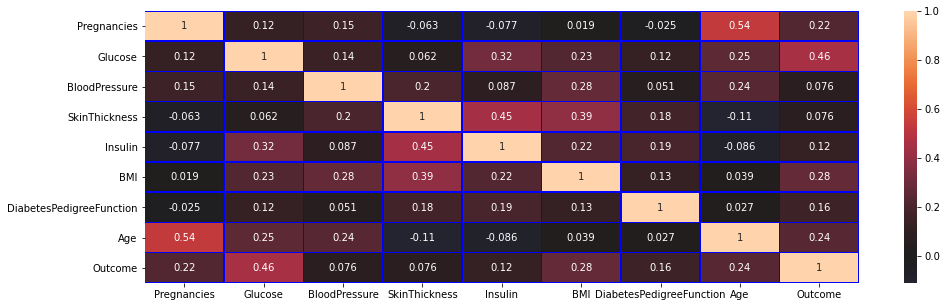

In [4]:
# Correlation matrix
corr_matrix_origin = (data.loc[:, data.columns]).corr(method ='pearson')
list_col_origin = list(data.columns)
plt.figure(figsize = (16,5))
ax = sns.heatmap(corr_matrix_origin, annot=True,
                 yticklabels=list_col_origin,
                 xticklabels=list_col_origin,
                 annot_kws={'size': 10},
                linecolor='blue', center=False,  linewidths=.5)

As we can see from previous heatmap correlation matrix we don't have high corelation between features, a little higher between age and pregnancies. 

#### Data visualisation

In [5]:
# Let see the distribution of each independent variable
# First we will define function for subplots of histograms
def sub_hist(data, m=15, n=25, num_col = None, *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    for i in range(i):
        for j in range(num_col):
            if (2*i+j) < data.shape[1]:
                sns.distplot(data[data.columns[2*i+j]], ax=axes[i,j] )
            else:
                axes[i,j].set_axis_off()


In [6]:
data_continual = data.drop(['Pregnancies', 'Outcome'], axis = 1)
data_continual

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,138,62,35,0,33.6,0.127,47
1,84,82,31,125,38.2,0.233,23
2,145,0,0,0,44.2,0.630,31
3,135,68,42,250,42.3,0.365,24
4,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...
1995,75,64,24,55,29.7,0.370,33
1996,179,72,42,130,32.7,0.719,36
1997,85,78,0,0,31.2,0.382,42
1998,129,110,46,130,67.1,0.319,26


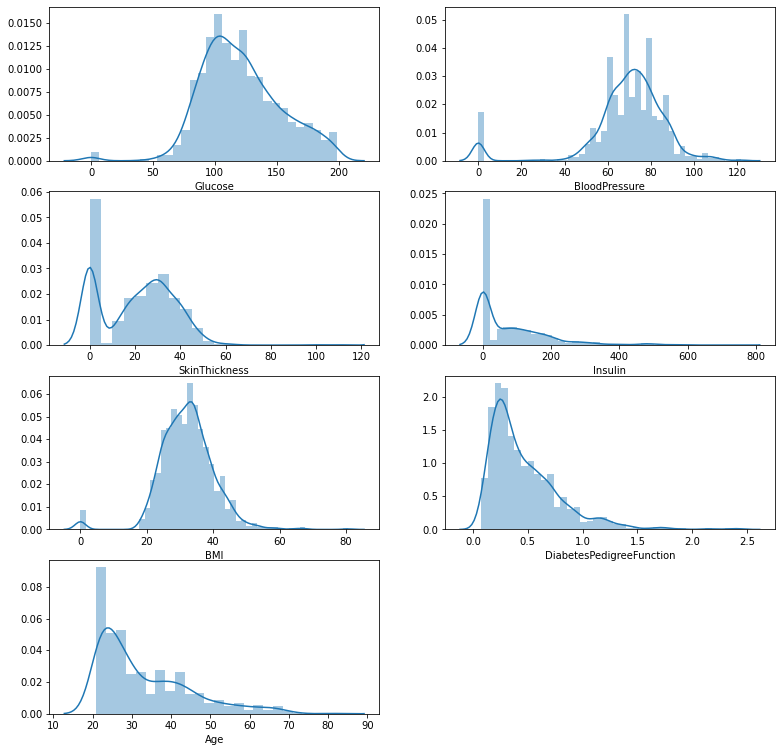

In [7]:
# Let see the distribution of each continual feature in dataset
sub_hist(data_continual,m=13,n=13, num_col = 2)

In [8]:
# Let create function for subplots of boxplots
def sub_boxplot(data, m=15, n=25, num_col = None, y=None, hue=None, orient='h', *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    for i in range(i):
        for j in range(num_col):
            if (2*i+j) < data.shape[1]:
                sns.boxplot(x = data.columns[2*i+j], y=y, data=data, hue=hue, orient=orient , ax=axes[i,j] )
            else:
                axes[i,j].set_axis_off()

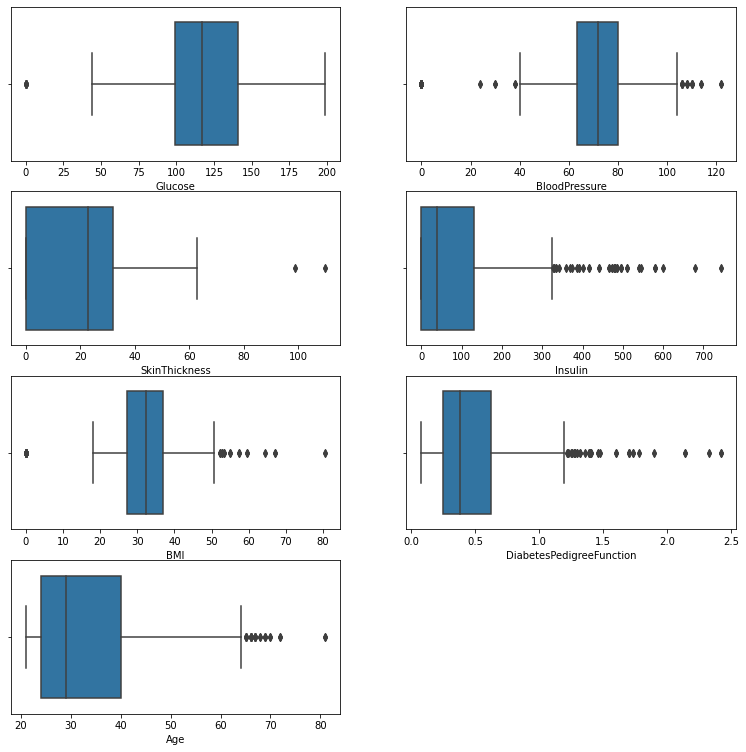

In [9]:
# Let see the distribution of each continual feature in dataset using boxplots
sub_boxplot(data_continual,m=13,n=13, num_col = 2)

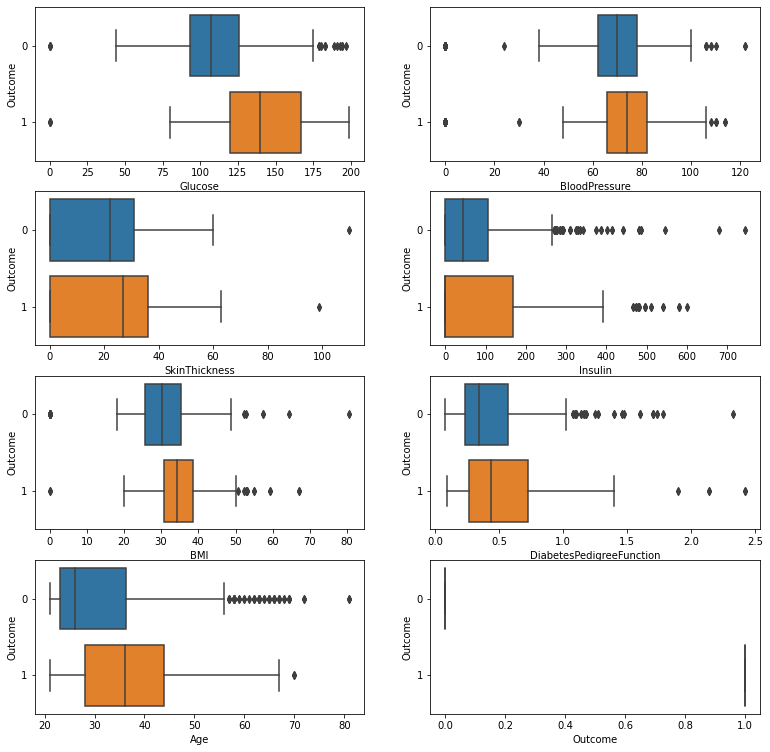

In [10]:
sub_boxplot(data = data.drop('Pregnancies', axis = 1), y = 'Outcome',n=13,m=13, orient ='h', num_col = 2)

In [42]:
# Let create function for ploting distribution of descrete variables
def sub_countplot(data, m=15, n=25, hue = None, num_col = None, *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    if i == 1:
        for j in range(num_col):
            sns.countplot(x = data_descrete.iloc[:,j], ax=axes[j])
    else:
        for i in range(i):
            for j in range(num_col):
                if (2*i+j) < data.shape[1]:
                    sns.countplot(data[data.columns[2*i+j]], hue=hue, ax=axes[i,j] )
                else:
                    axes[i,j].set_axis_off()

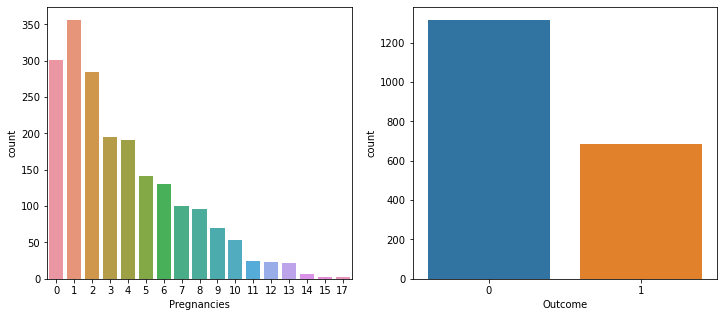

In [45]:
# Let see the distribution of each descrete feature and target variable
sub_countplot(data = data.iloc[:,[0,8]], m=12, n=5, num_col = 2)

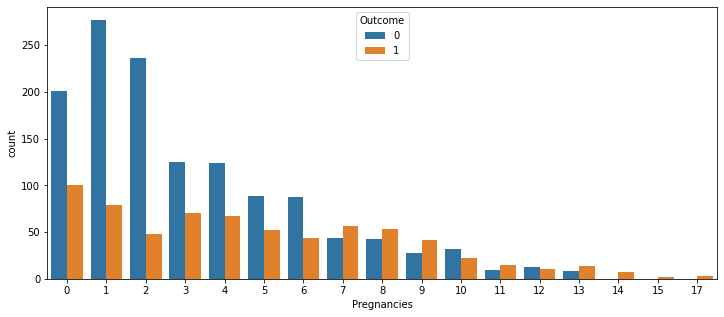

In [52]:
# Let see dist of descrete features by target
plt.figure(figsize=(12,5))
sns.countplot(x = 'Pregnancies', hue = 'Outcome', data = data)

#### Dealing with missing data

In [53]:
# Missing values in whole dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Split dataset on train and test

In [54]:
X = data.drop('Outcome', axis = 1)
y = data.Outcome
print(X.head(2))
print(y)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   

   DiabetesPedigreeFunction  Age  
0                     0.127   47  
1                     0.233   23  
0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64


In [55]:
# Split independent and target variable on train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

In [56]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1400, 8)
y_train shape: (1400,)
X_test shape: (600, 8)
y_test shape: (600,)


#### Balance dataset

Since our dataset is imbalanced then we need to use one of tehnique to balance our dataset. We will oversample the minor target class using imblearn.over_sampling.SMOTE

In [57]:
import sklearn
from imblearn.over_sampling import SMOTE

# Let oversample minor target class
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)
print(f" Oversampled train set shape: {X_train_sm.shape}\n")

 Oversampled train set shape: (1838, 8)



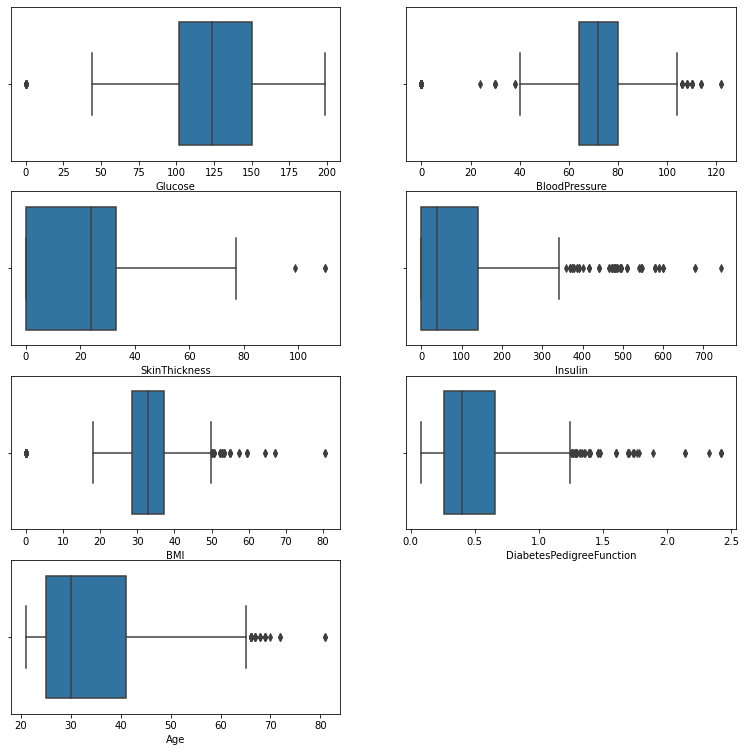

In [59]:
# Let see the distribution
sub_boxplot(data = X_train_sm.drop(['Pregnancies'], axis = 1),m=13,n=13, num_col = 2)

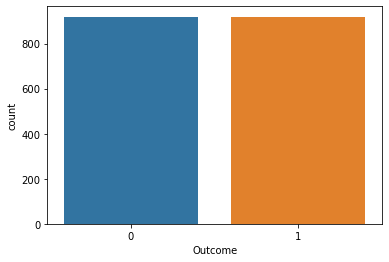

In [60]:
# Distribution of target variable
sns.countplot(y_train_sm)

#### Bringing features onto the same scale¶

In [61]:
# First we will try to normalize data and than we will observe the distribution of data
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_sm_norm = norm.fit_transform(X_train_sm)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [62]:
# Second we will try to standardize data and than we will observe the distribution of data
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_sm_std = stdsc.fit_transform(X_train_sm)
X_test_std = stdsc.transform(X_test)

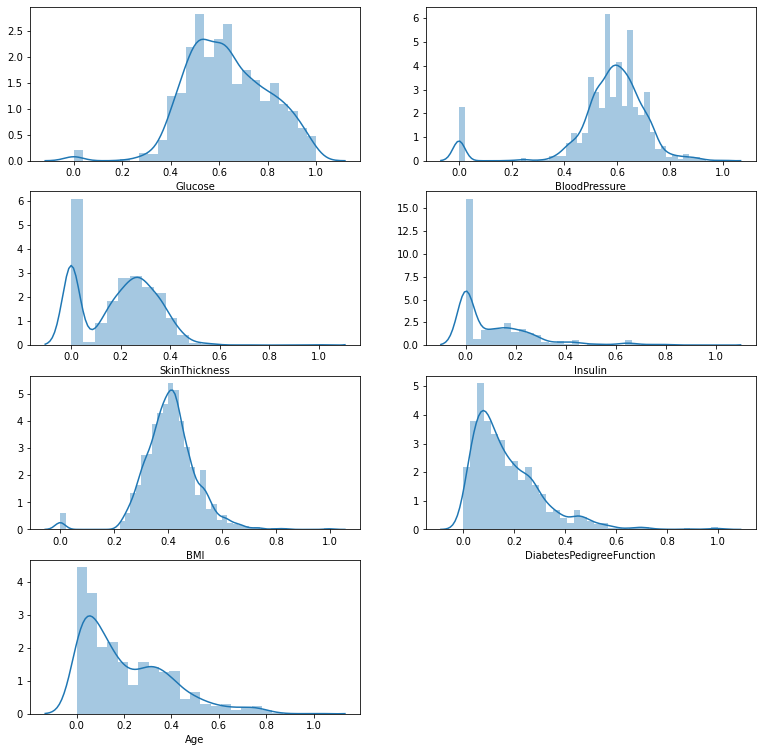

In [63]:
# Distribution of normalized data train data
col_names = list(data.columns)
col_names.remove('Outcome')
df_norm = pd.DataFrame(data = X_train_sm_norm, columns = col_names)
sub_hist(df_norm.iloc[:, 1:],m=13,n=13, num_col = 2)

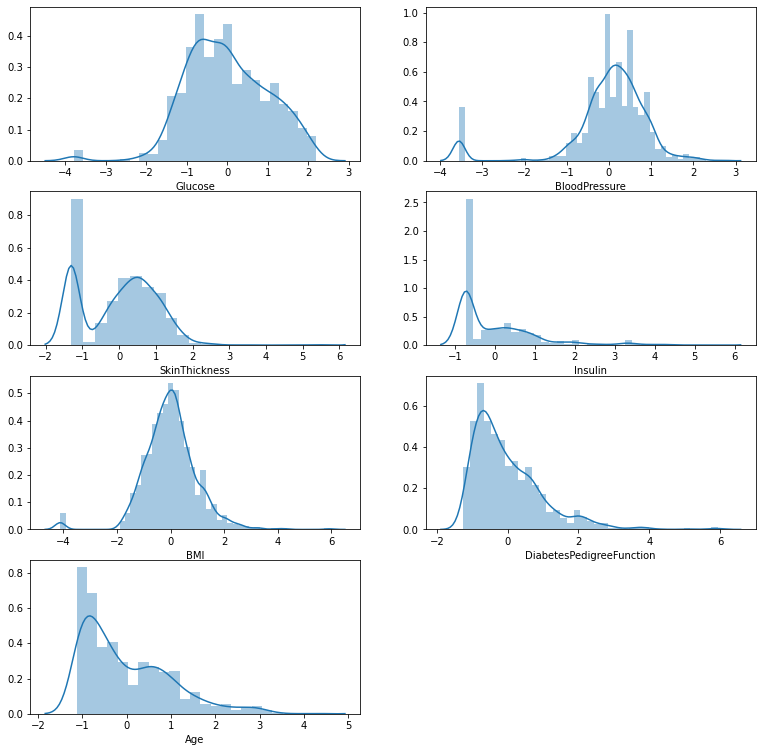

In [64]:
# Dist of standardized data
df_std = pd.DataFrame(data = X_train_sm_std, columns = col_names)
sub_hist(df_std.iloc[:, 1:],m=13,n=13, num_col = 2)

#### Data modeling

Let put 10 or more different models on standardized and balanced train dataset and than compare which one is modelling the best.

In [65]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Create dict acc_scores to see which model is the best
acc_scores_sm_std = {}

In [68]:
# Define function for train,fit and predict new outcomes 
def train_model(model, X_train, y_train, X_test, y_test, model_name, acc_scores):
    clf = model
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f"Cross_val_scores: {scores} \n ")
    print(f"Cross_val_scores_mean: {scores.mean()} \n ")
    print(f"Cross_val_scores_std: {scores.std()} \n")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_scores[model_name] = accuracy_score(y_test, y_pred)
    print(f"Acc_score of {model_name}: {acc_scores[model_name]}")
    return model, acc_scores

In [69]:
# First model SVC kernel linear
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, NuSVC, LinearSVC
svc_linear = SVC(kernel='linear', C=1)
model_1 = train_model(svc_linear, X_train_sm_std, y_train_sm, X_test_std, y_test, 'svc_linear', acc_scores_sm_std)

Cross_val_scores: [0.75815217 0.73913043 0.75271739 0.73841962 0.77929155] 
 
Cross_val_scores_mean: 0.7535422343324252 
 
Cross_val_scores_std: 0.014975665612532588 

Acc_score of svc_linear: 0.7566666666666667


In [70]:
# Second model SVC_rbf
SVC_rbf = SVC()
model_2 = train_model(SVC_rbf, X_train_sm_std, y_train_sm, X_test_std, y_test, 'SVC_rbf', acc_scores_sm_std)

Cross_val_scores: [0.82880435 0.83152174 0.81521739 0.83923706 0.85013624] 
 
Cross_val_scores_mean: 0.8329833550527189 
 
Cross_val_scores_std: 0.011563391680259178 

Acc_score of SVC_rbf: 0.83


In [71]:
# Third model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_3 = train_model(rf, X_train_sm_std, y_train_sm, X_test_std, y_test, 'ran_forest_def', acc_scores_sm_std)

Cross_val_scores: [0.95108696 0.93478261 0.9375     0.9346049  0.95367847] 
 
Cross_val_scores_mean: 0.9423305887927971 
 
Cross_val_scores_std: 0.008311934365232594 

Acc_score of ran_forest_def: 0.9766666666666667


In [72]:
# Fourth model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
model_4 = train_model(log_reg, X_train_sm_std, y_train_sm, X_test_std, y_test, 'log_reg_def', acc_scores_sm_std)

Cross_val_scores: [0.74184783 0.75       0.76086957 0.73569482 0.76294278] 
 
Cross_val_scores_mean: 0.7502709986968369 
 
Cross_val_scores_std: 0.010548855995250227 

Acc_score of log_reg_def: 0.7616666666666667


Text(0, 0.5, 'Testing Accuracy')

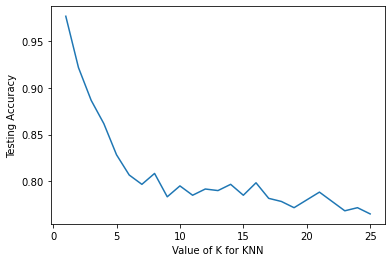

In [73]:
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_sm_std,y_train_sm)
        y_pred=knn.predict(X_test_std)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))


#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [76]:
models_KNN = {}
for k in range(1,5):
    KNN = KNeighborsClassifier(n_neighbors=k)
    print(f"Results of KNN with {k} neighbors: \n ")
    
    models_KNN['KNN_' + str(k)+'_neigh'] = train_model(KNN, X_train_sm_std, y_train_sm, X_test_std, y_test,acc_scores = acc_scores_sm_std, model_name ='KNN_'+str(k))

Results of KNN with 1 neighbors: 
 
Cross_val_scores: [0.95108696 0.94293478 0.94565217 0.95095368 0.95640327] 
 
Cross_val_scores_mean: 0.9494061722544723 
 
Cross_val_scores_std: 0.00469362487159953 

Acc_score of KNN_1: 0.9766666666666667
Results of KNN with 2 neighbors: 
 
Cross_val_scores: [0.94021739 0.9076087  0.9076087  0.94822888 0.94822888] 
 
Cross_val_scores_mean: 0.9303785096552541 
 
Cross_val_scores_std: 0.01882022367986316 

Acc_score of KNN_2: 0.9216666666666666
Results of KNN with 3 neighbors: 
 
Cross_val_scores: [0.89673913 0.87771739 0.85869565 0.89373297 0.90735695] 
 
Cross_val_scores_mean: 0.8868484184338348 
 
Cross_val_scores_std: 0.016981030200830846 

Acc_score of KNN_3: 0.8866666666666667
Results of KNN with 4 neighbors: 
 
Cross_val_scores: [0.86413043 0.86684783 0.82608696 0.8719346  0.91008174] 
 
Cross_val_scores_mean: 0.8678163132330292 
 
Cross_val_scores_std: 0.0266802917225268 

Acc_score of KNN_4: 0.8616666666666667


In [78]:
# 9th XGBoost
import xgboost as xgb
xg_class = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# Fit the model
xg_class.fit(X_train_sm_std,y_train_sm)
# Test model
y_pred = xg_class.predict(X_test_std)
acc_scores_sm_std['xgb_reg_logistic'] = accuracy_score(y_test, y_pred)

print(acc_scores_sm_std['xgb_reg_logistic'])

0.71


In [81]:
# 10th model SGDClassifier
from sklearn.linear_model import SGDClassifier
sgdclass = SGDClassifier(max_iter=1000, tol=1e-3)
model_10 = train_model(sgdclass, X_train_sm_std, y_train_sm, X_test_std, y_test, acc_scores=acc_scores_sm_std, model_name = 'sgdclass')

Cross_val_scores: [0.7173913  0.75       0.76630435 0.71117166 0.77111717] 
 
Cross_val_scores_mean: 0.7431968961023575 
 
Cross_val_scores_std: 0.024703530953756554 

Acc_score of sgdclass: 0.7433333333333333


In [83]:
# 11th model DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
Dec_tree_class = DecisionTreeClassifier(random_state=0)
model_11 = train_model(Dec_tree_class, X_train_sm_std, y_train_sm, X_test_std, y_test, acc_scores=acc_scores_sm_std, model_name = 'Dec_tree_class')

Cross_val_scores: [0.93478261 0.92663043 0.91304348 0.8773842  0.9346049 ] 
 
Cross_val_scores_mean: 0.9172891245113138 
 
Cross_val_scores_std: 0.021464142771025617 

Acc_score of Dec_tree_class: 0.9683333333333334


In [84]:
# 12th model ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
extra_tree = ExtraTreeClassifier(random_state=0)
bag_class_extra_tree = BaggingClassifier(extra_tree, random_state=0)
model_12 = train_model(bag_class_extra_tree, X_train_sm_std, y_train_sm, X_test_std, y_test, acc_scores=acc_scores_sm_std, model_name = 'bag_class_extra_tree')

Cross_val_scores: [0.92119565 0.94021739 0.9375     0.91825613 0.94822888] 
 
Cross_val_scores_mean: 0.9330796114204478 
 
Cross_val_scores_std: 0.011497410374420647 

Acc_score of bag_class_extra_tree: 0.9716666666666667


In [85]:
# Lets plot the results of models
df_results = pd.DataFrame({'models': list(acc_scores_sm_std.keys()),
                          'models_acc': list(acc_scores_sm_std.values())})
df_results

,models,models_acc
0,svc_linear,0.756667
1,SVC_rbf,0.830000
2,ran_forest_def,0.976667
3,log_reg_def,0.761667
4,KNN_1,0.976667
5,KNN_2,0.921667
6,KNN_3,0.886667
7,KNN_4,0.861667
8,xgb_reg_logistic,0.710000
9,sgdclass,0.743333


[Text(0, 0.5, 'models_acc')]

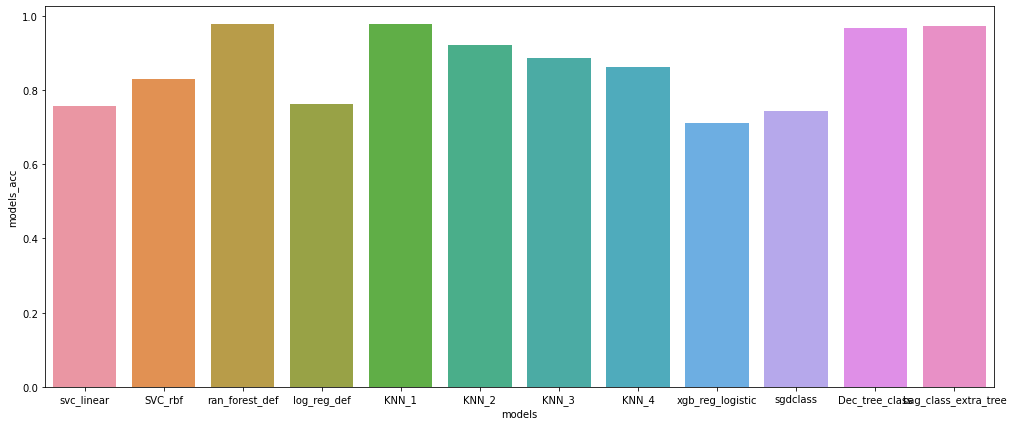

In [86]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "models", y = "models_acc", data = df_results)
ax.set(ylabel = "models_acc")

In [87]:
# Let see which model gives the best result
print(f"The model with best acc is {max(acc_scores_sm_std, key=acc_scores_sm_std.get)} and it's acc is {acc_scores_sm_std[max(acc_scores_sm_std, key=acc_scores_sm_std.get)]:.3f}.")

The model with best acc is ran_forest_def and it's acc is 0.977.
